# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
import numpy as np

x_train_noise10 = x_train + np.random.normal(0, 255*.10, x_train.shape)
x_test_noise10 = x_test + np.random.normal(0, 255*.10, x_test.shape)

x_train_noise15 = x_train + np.random.normal(0, 255*.15, x_train.shape)
x_test_noise15 = x_test + np.random.normal(0, 255*.15, x_test.shape)

x_train_noise20 = x_train + np.random.normal(0, 255*.20, x_train.shape)
x_test_noise20 = x_test + np.random.normal(0, 255*.20, x_test.shape)

x_train_noise50 = x_train + np.random.normal(0, 255*.50, x_train.shape)
x_test_noise50 = x_test + np.random.normal(0, 255*.50, x_test.shape)

In [5]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_nn = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_nn[0])
print('Test accuracy:', score_nn[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2420 - accuracy: 0.9265 - val_loss: 0.

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise10, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise10, y_test))
score_nn10 = model.evaluate(x_test_noise10, y_test, verbose=0)
print('Test loss:', score_nn10[0])
print('Test accuracy:', score_nn10[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 3.8833 - accuracy: 0.1090 - val_loss: 2

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise15, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise15, y_test))
score_nn15 = model.evaluate(x_test_noise15, y_test, verbose=0)
print('Test loss:', score_nn15[0])
print('Test accuracy:', score_nn15[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 4.8214 - accuracy: 0.1085 - val_loss: 2

In [8]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise20, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise20, y_test))
score_nn20 = model.evaluate(x_test_noise20, y_test, verbose=0)
print('Test loss:', score_nn20[0])
print('Test accuracy:', score_nn20[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 5.9826 - accuracy: 0.1077 - val_loss: 2

In [9]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise50, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise50, y_test))
score_nn50 = model.evaluate(x_test_noise50, y_test, verbose=0)
print('Test loss:', score_nn50[0])
print('Test accuracy:', score_nn50[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 10.7068 - accuracy: 0.1089 - val_loss: 

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [10]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score_cn = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_cn[0])
print('Test accuracy:', score_cn[1])

Epoch 1/12
469/469 [==============================] - 117s 249ms/step - loss: 2.2752 - accuracy: 0.1705 - val_loss: 2.2320 - val_accuracy: 0.3669
Epoch 2/12
469/469 [==============================] - 115s 246ms/step - loss: 2.2066 - accuracy: 0.2875 - val_loss: 2.1504 - val_accuracy: 0.4971
Epoch 3/12
469/469 [==============================] - 116s 248ms/step - loss: 2.1202 - accuracy: 0.3871 - val_loss: 2.0392 - val_accuracy: 0.6126
Epoch 4/12
469/469 [==============================] - 117s 249ms/step - loss: 2.0047 - accuracy: 0.4634 - val_loss: 1.8926 - val_accuracy: 0.6838
Epoch 5/12
469/469 [==============================] - 117s 250ms/step - loss: 1.8616 - accuracy: 0.5206 - val_loss: 1.7147 - val_accuracy: 0.7254
Epoch 6/12
469/469 [==============================] - 117s 249ms/step - loss: 1.6990 - accuracy: 0.5627 - val_loss: 1.5176 - val_accuracy: 0.7540
Epoch 7/12
469/469 [==============================] - 116s 248ms/step - loss: 1.5319 - accuracy: 0.5975 - val_loss: 1.3216 -

In [12]:
x_train_noise10 = x_train + np.random.normal(0, 255*.10, x_train.shape)
x_test_noise10 = x_test + np.random.normal(0, 255*.10, x_test.shape)

x_train_noise15 = x_train + np.random.normal(0, 255*.15, x_train.shape)
x_test_noise15 = x_test + np.random.normal(0, 255*.15, x_test.shape)

x_train_noise20 = x_train + np.random.normal(0, 255*.20, x_train.shape)
x_test_noise20 = x_test + np.random.normal(0, 255*.20, x_test.shape)

x_train_noise50 = x_train + np.random.normal(0, 255*.50, x_train.shape)
x_test_noise50 = x_test + np.random.normal(0, 255*.50, x_test.shape)

In [13]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise10, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise10, y_test))
score_cn10 = model.evaluate(x_test_noise10, y_test, verbose=0)
print('Test loss:', score_cn10[0])
print('Test accuracy:', score_cn10[1])

Epoch 1/12
469/469 [==============================] - 118s 251ms/step - loss: 7.1525 - accuracy: 0.1005 - val_loss: 2.4515 - val_accuracy: 0.1001
Epoch 2/12
469/469 [==============================] - 118s 253ms/step - loss: 2.8377 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1003
Epoch 3/12
469/469 [==============================] - 118s 252ms/step - loss: 2.3872 - accuracy: 0.1020 - val_loss: 2.3025 - val_accuracy: 0.1008
Epoch 4/12
469/469 [==============================] - 118s 252ms/step - loss: 2.3355 - accuracy: 0.1011 - val_loss: 2.3025 - val_accuracy: 0.1010
Epoch 5/12
469/469 [==============================] - 122s 260ms/step - loss: 2.3204 - accuracy: 0.1009 - val_loss: 2.3025 - val_accuracy: 0.1012
Epoch 6/12
469/469 [==============================] - 118s 251ms/step - loss: 2.3155 - accuracy: 0.1072 - val_loss: 2.3025 - val_accuracy: 0.1136
Epoch 7/12
469/469 [==============================] - 118s 251ms/step - loss: 2.3111 - accuracy: 0.1111 - val_loss: 2.3025 -

In [14]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise15, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise15, y_test))
score_cn15 = model.evaluate(x_test_noise15, y_test, verbose=0)
print('Test loss:', score_cn15[0])
print('Test accuracy:', score_cn15[1])

Epoch 1/12
469/469 [==============================] - 121s 259ms/step - loss: 9.6275 - accuracy: 0.0999 - val_loss: 2.6429 - val_accuracy: 0.0973
Epoch 2/12
469/469 [==============================] - 126s 269ms/step - loss: 3.3043 - accuracy: 0.0988 - val_loss: 2.3052 - val_accuracy: 0.0986
Epoch 3/12
469/469 [==============================] - 126s 269ms/step - loss: 2.4603 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1141
Epoch 4/12
469/469 [==============================] - 122s 260ms/step - loss: 2.3572 - accuracy: 0.1084 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 5/12
469/469 [==============================] - 120s 256ms/step - loss: 2.3325 - accuracy: 0.1104 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 6/12
469/469 [==============================] - 120s 255ms/step - loss: 2.3234 - accuracy: 0.1095 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 7/12
469/469 [==============================] - 131s 279ms/step - loss: 2.3180 - accuracy: 0.1106 - val_loss: 2.3025 -

In [15]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise20, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise20, y_test))
score_cn20 = model.evaluate(x_test_noise20, y_test, verbose=0)
print('Test loss:', score_cn20[0])
print('Test accuracy:', score_cn20[1])

Epoch 1/12
469/469 [==============================] - 119s 253ms/step - loss: 14.6517 - accuracy: 0.1010 - val_loss: 3.0254 - val_accuracy: 0.1003
Epoch 2/12
469/469 [==============================] - 120s 256ms/step - loss: 3.9864 - accuracy: 0.0999 - val_loss: 2.3054 - val_accuracy: 0.1042
Epoch 3/12
469/469 [==============================] - 121s 258ms/step - loss: 2.5208 - accuracy: 0.1022 - val_loss: 2.3026 - val_accuracy: 0.1023
Epoch 4/12
469/469 [==============================] - 120s 255ms/step - loss: 2.3815 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1026
Epoch 5/12
469/469 [==============================] - 120s 255ms/step - loss: 2.3432 - accuracy: 0.1046 - val_loss: 2.3026 - val_accuracy: 0.1026
Epoch 6/12
469/469 [==============================] - 136s 290ms/step - loss: 2.3284 - accuracy: 0.1036 - val_loss: 2.3026 - val_accuracy: 0.1026
Epoch 7/12
469/469 [==============================] - 128s 272ms/step - loss: 2.3200 - accuracy: 0.1041 - val_loss: 2.3026 

In [16]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise50, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise50, y_test))
score_cn50 = model.evaluate(x_test_noise50, y_test, verbose=0)
print('Test loss:', score_cn50[0])
print('Test accuracy:', score_cn50[1])

Epoch 1/12
469/469 [==============================] - 117s 249ms/step - loss: 33.0727 - accuracy: 0.1005 - val_loss: 4.2993 - val_accuracy: 0.0938
Epoch 2/12
469/469 [==============================] - 117s 249ms/step - loss: 6.8540 - accuracy: 0.1007 - val_loss: 2.3068 - val_accuracy: 0.1009
Epoch 3/12
469/469 [==============================] - 116s 246ms/step - loss: 2.8969 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 4/12
469/469 [==============================] - 115s 245ms/step - loss: 2.4970 - accuracy: 0.1098 - val_loss: 2.3025 - val_accuracy: 0.1136
Epoch 5/12
469/469 [==============================] - 116s 248ms/step - loss: 2.4137 - accuracy: 0.1113 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 6/12
469/469 [==============================] - 115s 246ms/step - loss: 2.3721 - accuracy: 0.1111 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 7/12
469/469 [==============================] - 116s 248ms/step - loss: 2.3493 - accuracy: 0.1119 - val_loss: 2.3026 

## Graphing Loss for Multi Layer Neural Network vs ConvNet with Noise
MLNN model has lower loss. 


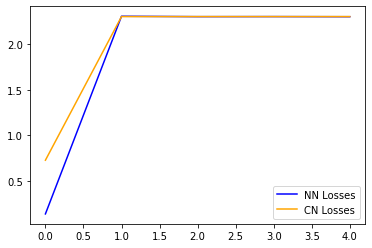

In [29]:
nn_losses = np.array([score_nn[0], score_nn10[0], score_nn15[0], score_nn20[0], score_nn50[0]])
cn_losses = np.array([score_cn[0], score_cn10[0], score_cn15[0], score_cn20[0], score_cn50[0]])
plt.plot(nn_losses, label='NN Losses', color='b')
plt.plot(cn_losses, label='CN Losses', color='orange')
plt.legend()

In [20]:
nn_losses

array([0.13880014, 2.30621624, 2.30174112, 2.30239344, 2.30105662])

In [21]:
cn_losses

array([0.72762102, 2.30252361, 2.30252004, 2.30253148, 2.30252719])

## Graphing Accurancy for Multi Layer Neural Network vs ConvNet with Noise
MLNN model has higher accuracy loss.

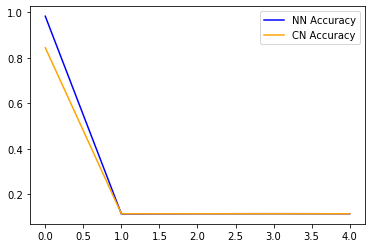

In [30]:
nn_accur = np.array([score_nn[1], score_nn10[1], score_nn15[1], score_nn20[1], score_nn50[1]])
cn_accur = np.array([score_cn[1], score_cn10[1], score_cn15[1], score_cn20[1], score_cn50[1]])
plt.plot(nn_accur, label='NN Accuracy', color='b')
plt.plot(cn_accur, label='CN Accuracy', color='orange')
plt.legend()

In [31]:
nn_accur

array([0.9835, 0.1128, 0.1135, 0.1138, 0.1135])

In [32]:
cn_accur

array([0.84490001, 0.1135    , 0.1135    , 0.1135    , 0.1135    ])